# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.126710e+01     7.245743e+00
 * time: 0.002463102340698242
     1     2.829664e+01     4.101233e+00
 * time: 0.006529092788696289
     2     1.875829e+01     4.502395e+00
 * time: 0.0116119384765625
     3     1.260719e+01     2.881855e+00
 * time: 0.016516923904418945
     4     1.237891e+01     3.902322e+00
 * time: 0.02066206932067871
     5     1.153832e+01     3.152974e+00
 * time: 0.025012969970703125
     6     1.014959e+01     2.019379e+00
 * time: 0.02897191047668457
     7     9.002422e+00     1.267916e+00
 * time: 0.03317904472351074
     8     8.398889e+00     6.071410e-01
 * time: 0.03742408752441406
     9     8.195368e+00     3.392933e-01
 * time: 0.041500091552734375
    10     8.146928e+00     7.082470e-01
 * time: 0.04466104507446289
    11     8.113376e+00     4.559270e-01
 * time: 0.04850196838378906
    12     8.072339e+00     3.908176e-01
 * time: 0.051599979400634766
    13     8.032458e+00     2.933151e-01
 * 

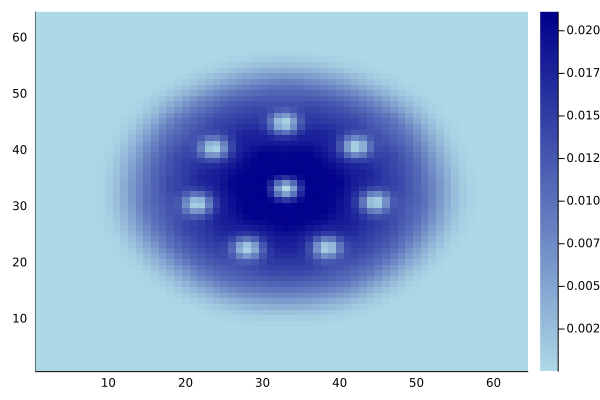

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)